Description: This code plots specific channels for the 1737 UTC GOES16 ABI volume seen as panel (b) in Fig. 3. Note that this could could be more compact by looping through channels as in Fig. 3. 

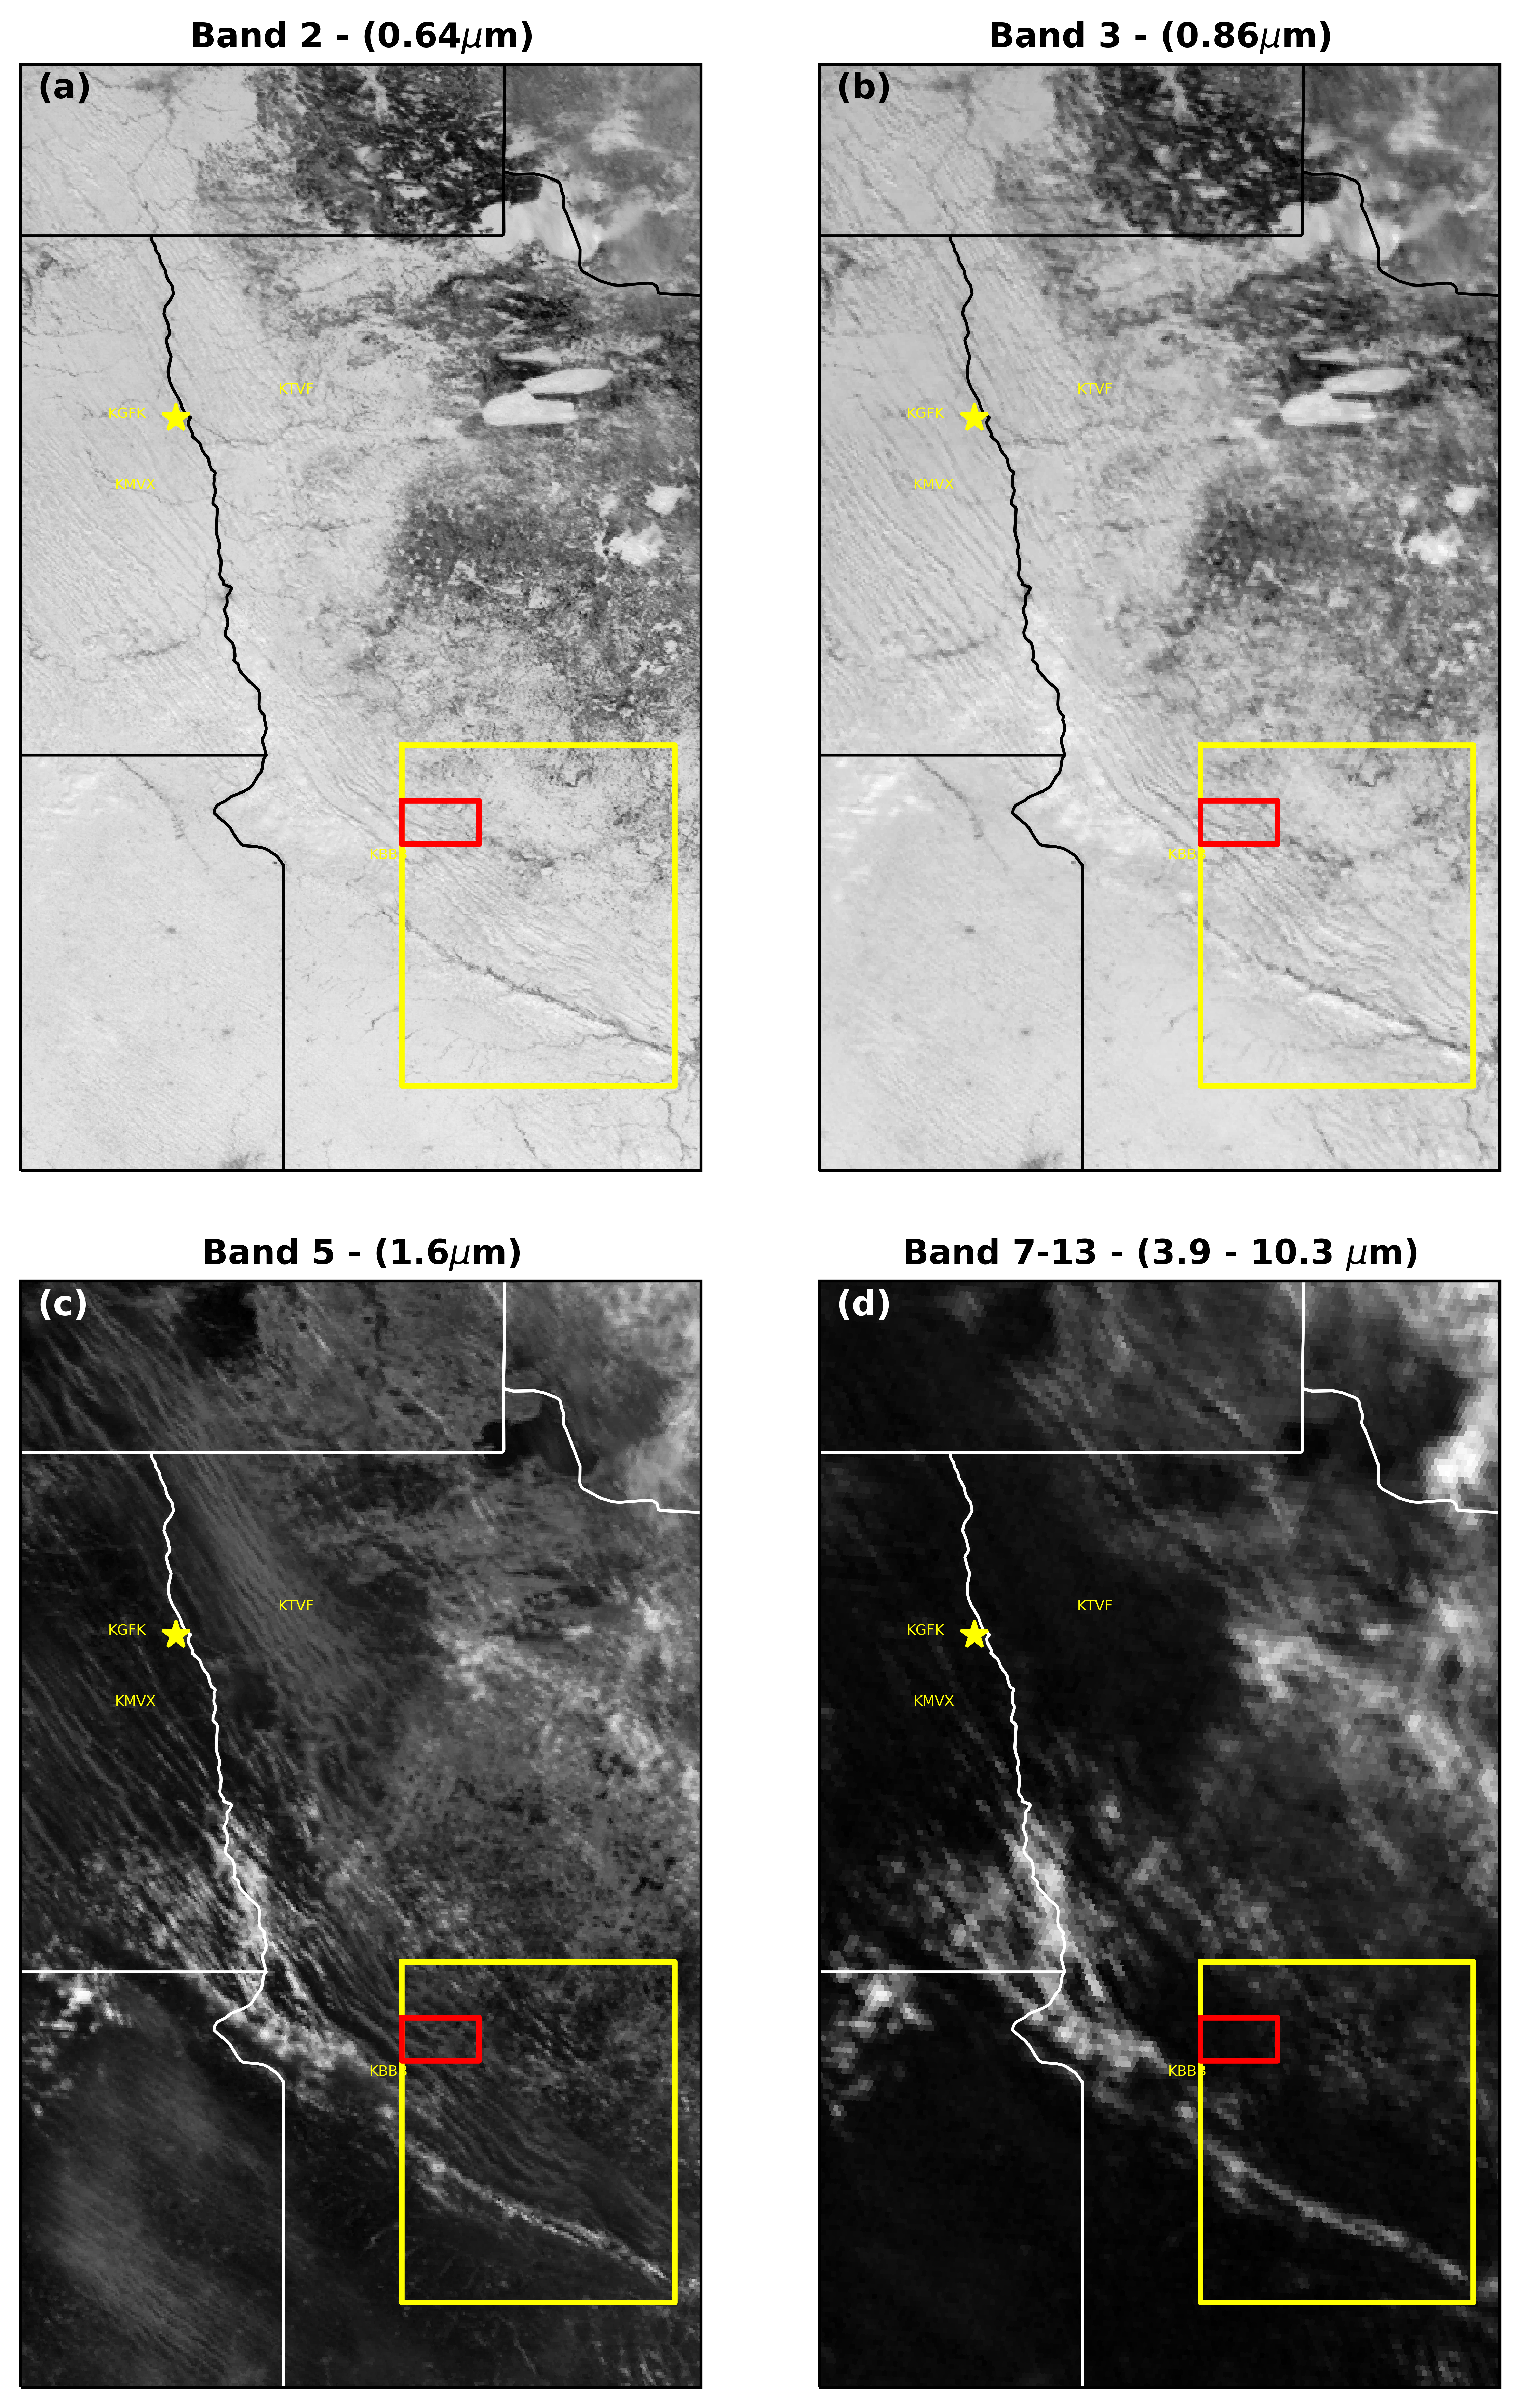

In [2]:
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import h5py
from satpy import Scene
from satpy.writers import get_enhanced_image
from glob import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

#define boundaries for radar ob region
radlons = [-97.826, -96.826, -96.826, -97.826,-97.826]
radlats = [48.028, 48.028, 47.028, 47.028,48.028]
ylons = [-95.76, -94.156, -94.156, -95.76,-95.76] #bounds of yellow box
ylats = [46, 46, 44, 44,46]
rlons = [-95.76, -95.307, -95.307, -95.76,-95.76] #bounds for red box
rlats = [45.673, 45.673, 45.42, 45.42,45.673]
#define common settings 
mpl.rcParams['axes.linewidth'] = 4 #set linewidth value globally
BASE_DIR = 'data/GOES16/'
date='20190551737137'
hour=date[7:11]
#Load scene, grabs all data with given start time. For GOES16 L1B -> C01-C16
scn = Scene(reader='abi_l1b', filenames=glob(BASE_DIR+'OR_ABI-L1b-RadC-*s'+date+'*.nc'))
chan=['C02','C03','C05','C07','C13']
scn.load(chan)
#Create files for each plotted band and transpose data for plotting. 
band_02 = get_enhanced_image(scn[0.64]).data.squeeze().transpose('y', 'x')
band_03 = get_enhanced_image(scn[0.865]).data.squeeze().transpose('y', 'x')
band_05 = get_enhanced_image(scn[1.61]).data.squeeze().transpose('y', 'x')
band_diff = (scn[3.9]-scn[10.35]).transpose('y', 'x')

#Create figure and setup projection
fig = plt.figure(figsize=(10,15), dpi=600)
abi_crs = scn[0.64].attrs['area'].to_cartopy_crs()

#Plot 1
ax = fig.add_subplot(2, 2, 1, projection=ccrs.PlateCarree())
ax.set_extent([-98, -94, 43.5, 50], crs=ccrs.PlateCarree())
ax.imshow(band_02.data, extent=abi_crs.bounds, origin='upper',cmap='Greys_r',transform=abi_crs)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='black')
ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='black')
ax.set_title('Band 2 - (0.64$\mu$m)',fontweight="bold",fontsize=12)
ax.plot(ylons, ylats, transform=ccrs.PlateCarree(),linewidth=2,color="yellow",zorder=1)
ax.plot(rlons, rlats, transform=ccrs.PlateCarree(),linewidth=2,color="red",zorder=1)

ax.plot(-97.08697021,47.92184258,color='yellow',transform=ccrs.PlateCarree(),marker='*',zorder=3,markersize=10)
ax.text(-95.6506-0.3,45.3319,'KBBB',color='yellow',transform=ccrs.PlateCarree(),fontsize=5)
ax.text(-97.08697021-0.4,47.92184258,'KGFK',color='yellow',transform=ccrs.PlateCarree(),fontsize=5)
ax.text(-96.1850-0.3,48.0657,'KTVF',color='yellow',transform=ccrs.PlateCarree(),fontsize=5)
ax.text(-97.3256,47.5278,'KMVX',color='yellow',transform=ccrs.PlateCarree(),fontsize=5,ha='center',va='center')
ax.text(-97.9, 49.8, '(a)', fontsize=12,weight='bold',color="black",zorder=3)

#===============================Plot 2==================================
ax = fig.add_subplot(2, 2, 2, projection=ccrs.PlateCarree())
ax.set_extent([-98, -94, 43.5, 50], crs=ccrs.PlateCarree())
ax.imshow(band_03.data, extent=abi_crs.bounds, origin='upper',cmap='Greys_r',transform=abi_crs)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='black')
ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='black')
ax.set_title('Band 3 - (0.86$\mu$m)',fontweight="bold",fontsize=12)
ax.plot(ylons, ylats, transform=ccrs.PlateCarree(),linewidth=2,color="yellow",zorder=1)
ax.plot(rlons, rlats, transform=ccrs.PlateCarree(),linewidth=2,color="red",zorder=1)
ax.plot(-97.08697021,47.92184258,color='yellow',transform=ccrs.PlateCarree(),marker='*',zorder=3,markersize=10)
ax.text(-95.6506-0.3,45.3319,'KBBB',color='yellow',transform=ccrs.PlateCarree(),fontsize=5)
ax.text(-97.08697021-0.4,47.92184258,'KGFK',color='yellow',transform=ccrs.PlateCarree(),fontsize=5)
ax.text(-96.1850-0.3,48.0657,'KTVF',color='yellow',transform=ccrs.PlateCarree(),fontsize=5)
ax.text(-97.3256,47.5278,'KMVX',color='yellow',transform=ccrs.PlateCarree(),fontsize=5,ha='center',va='center')
ax.text(-97.9, 49.8, '(b)', fontsize=12,weight='bold',color="black",zorder=3)

#===============================Plot 3==================================
ax = fig.add_subplot(2, 2, 3, projection=ccrs.PlateCarree())
ax.set_extent([-98, -94, 43.5, 50], crs=ccrs.PlateCarree())
ax.imshow(band_05.data, extent=abi_crs.bounds, origin='upper',cmap='Greys_r',transform=abi_crs)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='white')
ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='white')
ax.set_title('Band 5 - (1.6$\mu$m)',fontweight="bold",fontsize=12)
ax.plot(ylons, ylats, transform=ccrs.PlateCarree(),linewidth=2,color="yellow",zorder=1)
ax.plot(rlons, rlats, transform=ccrs.PlateCarree(),linewidth=2,color="red",zorder=1)
ax.plot(-97.08697021,47.92184258,color='yellow',transform=ccrs.PlateCarree(),marker='*',zorder=3,markersize=10)
ax.text(-95.6506-0.3,45.3319,'KBBB',color='yellow',transform=ccrs.PlateCarree(),fontsize=5)
ax.text(-97.08697021-0.4,47.92184258,'KGFK',color='yellow',transform=ccrs.PlateCarree(),fontsize=5)
ax.text(-96.1850-0.3,48.0657,'KTVF',color='yellow',transform=ccrs.PlateCarree(),fontsize=5)
ax.text(-97.3256,47.5278,'KMVX',color='yellow',transform=ccrs.PlateCarree(),fontsize=5,ha='center',va='center')
ax.text(-97.9, 49.8, '(c)', fontsize=12,weight='bold',color="white",zorder=3)

#===============================Plot 4==================================
ax = fig.add_subplot(2, 2, 4, projection=ccrs.PlateCarree())
ax.set_extent([-98, -94, 43.5, 50], crs=ccrs.PlateCarree())
ax.imshow(band_diff.data, extent=abi_crs.bounds, origin='upper',cmap='Greys_r',transform=abi_crs)
ax.add_feature(cfeature.COASTLINE.with_scale('10m'), edgecolor='white')
ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='white')
ax.set_title('Band 7-13 - (3.9 - 10.3 $\mu$m)',fontweight="bold",fontsize=12)
ax.plot(ylons, ylats, transform=ccrs.PlateCarree(),linewidth=2,color="yellow",zorder=1)
ax.plot(rlons, rlats, transform=ccrs.PlateCarree(),linewidth=2,color="red",zorder=1)
ax.plot(-97.08697021,47.92184258,color='yellow',transform=ccrs.PlateCarree(),marker='*',zorder=3,markersize=10)
ax.text(-95.6506-0.3,45.3319,'KBBB',color='yellow',transform=ccrs.PlateCarree(),fontsize=5)
ax.text(-97.08697021-0.4,47.92184258,'KGFK',color='yellow',transform=ccrs.PlateCarree(),fontsize=5)
ax.text(-96.1850-0.3,48.0657,'KTVF',color='yellow',transform=ccrs.PlateCarree(),fontsize=5)
ax.text(-97.3256,47.5278,'KMVX',color='yellow',transform=ccrs.PlateCarree(),fontsize=5,ha='center',va='center')
ax.text(-97.9, 49.8, '(d)', fontsize=12,weight='bold',color="white",zorder=3)
plt.subplots_adjust(hspace = 0.1, wspace = 0.01)
#plt.savefig('KJ_MWR_2020_Fig05_final.png', dpi=600, bbox_inches='tight')
#plt.savefig('KJ_MWR_2020_Fig05_final.pdf', format='pdf', bbox_inches='tight')
plt.show()